In [10]:
import xgboost as xgb
import pandas as pd
import numpy as np
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgboost_model.json')
shap.initjs()

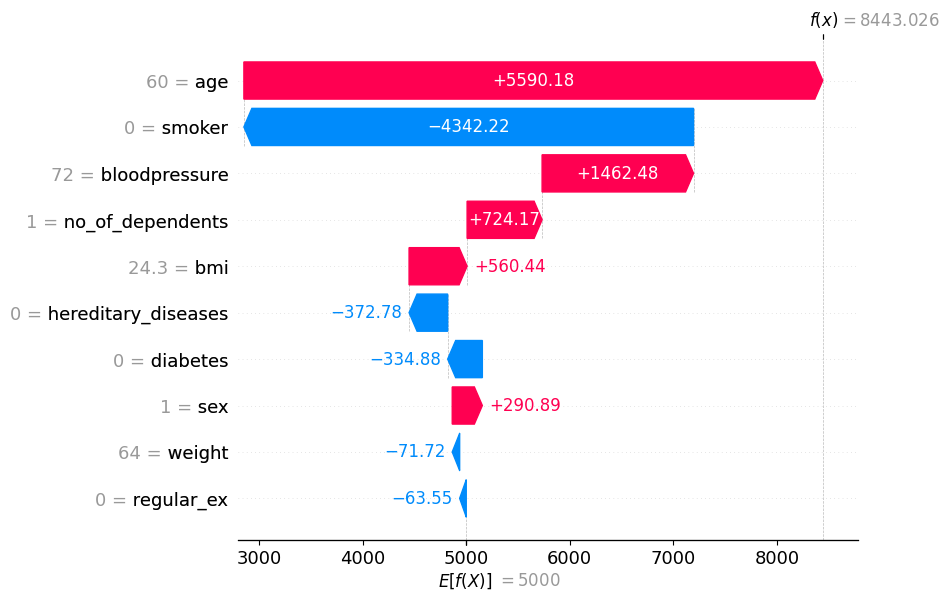

In [11]:
import shap
import numpy as np
import pandas as pd

# Initialize JavaScript visualization code for SHAP
shap.initjs()

# Your instance as a NumPy array
X = np.array([60,1,64,24.3,0,1,0,72,0,0])
X = X.reshape(1, -1)

# Define your feature names
#feature_names = ['age','sex','weight','bmi','hereditary_diseases','no_of_dependents','smoker','bloodpressure','diabetes','regular_ex','job_title']
feature_names = ['age','sex','weight','bmi','hereditary_diseases','no_of_dependents','smoker','bloodpressure','diabetes','regular_ex']
# Convert your instance into a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Calculate SHAP values
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(df)

# Create a SHAP Explanation object
shap_values_explanation = shap_values_explanation = shap.Explanation(values=shap_values, base_values=5000, data=df)

# Create a waterfall plot
shap.plots.waterfall(shap_values_explanation[0])
